In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Single trace, no noise

/tmp/ipykernel_61/774428577.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


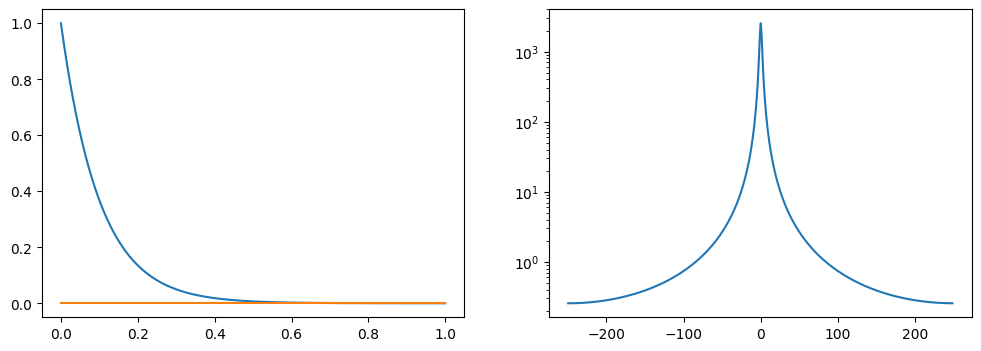

In [42]:
N = 500
tau = 0.1
t = np.linspace(0,1,N)
I = np.exp(-t/tau)
Q = I*0
Z = I+1j*Q

# since I will not inverse transforming this, I will shift the arrays already for plotting convenience
s = np.fft.fftshift
Z_f = s(np.fft.fft(Z))
f = s(np.fft.fftfreq(N,t[1]-t[0]))

plt.subplots(figsize=(12,4))
plt.subplot(121)
plt.plot(t,I)
plt.plot(t,Q)
plt.subplot(122)
plt.plot(f,np.abs(Z_f)**2)
plt.yscale("log")

# Ensemble of traces, white noise

/tmp/ipykernel_61/3053664571.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


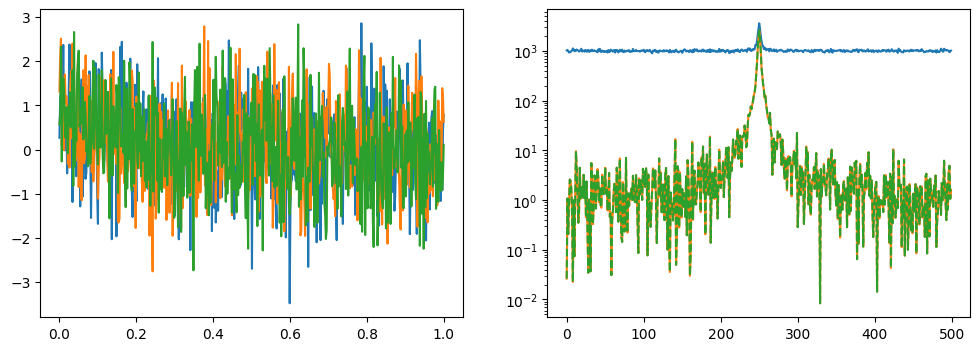

In [130]:
N = 500
N_ens = 600

tau = 0.1
t = np.linspace(0,1,N)
size = (N,N_ens)

I = np.outer(np.exp(-t/tau), np.ones(N_ens))
A_n = 1
I += np.random.normal(size=size)*A_n
Q = np.zeros(size)
Q += np.random.normal(size=size)*A_n
Z = I + 1j*Q

Z_f = np.fft.fft(Z, axis=0)

PSD1 = s(np.average(np.abs(Z_f)**2, axis=1))
PSD2 = s(np.abs(np.average(Z_f, axis=1))**2)
PSD3 = s(np.abs(np.fft.fft(np.average(Z,axis=1)))**2)

plt.subplots(figsize=(12,4))
plt.subplot(121)
plt.plot(t,I[:,0:3])
plt.subplot(122)
plt.plot(PSD1)
plt.plot(PSD2)
plt.plot(PSD3,"--")
plt.yscale('log')

/tmp/ipykernel_61/3961078089.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


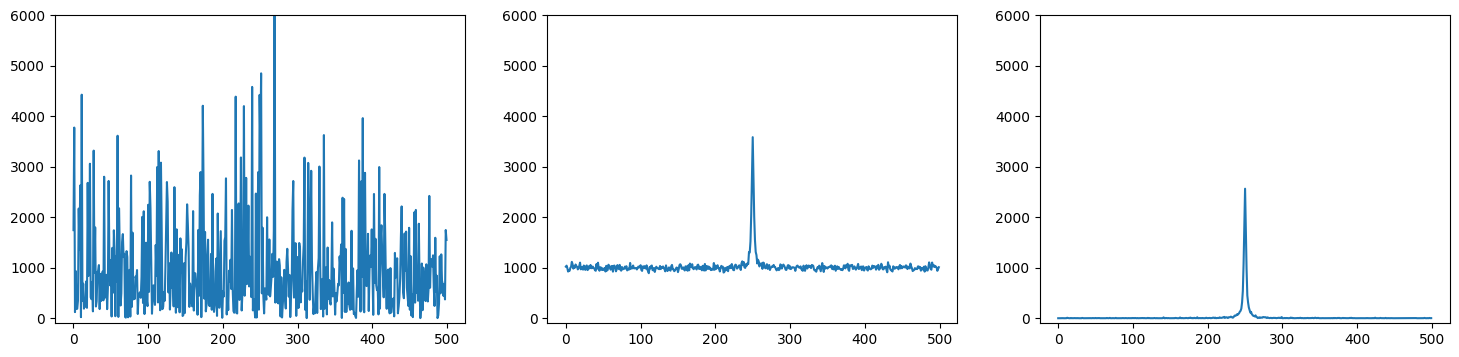

In [134]:
ym=6000
plt.subplots(figsize=(18,4))
plt.subplot(131)
plt.plot(s(np.abs(Z_f[:,0])**2))
plt.ylim(-100,ym)
plt.subplot(132)
plt.plot(PSD1)
plt.ylim(-100,ym)
plt.subplot(133)
plt.ylim(-100,ym)
plt.plot(PSD2)
#plt.xlim(200,300)

# Ensemble of traces, with stochastic extra frequencies

Proper FFT (complex quadrature):

/tmp/ipykernel_61/1418615700.py:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


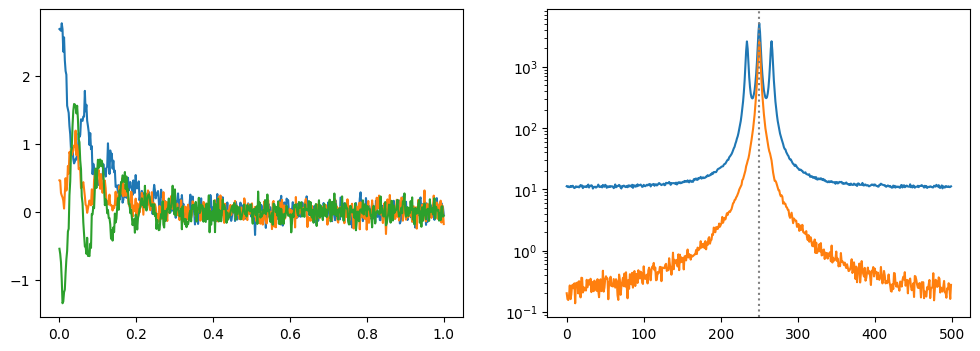

In [147]:
N = 500
N_ens = 1000

tau = 0.1
t = np.linspace(0,1,N)
size = (N,N_ens)

A_n = 0.1
I = np.outer(np.exp(-t/tau), np.ones(N_ens))
I += np.random.normal(size=size)*A_n
Q = np.zeros(size)
Q += np.random.normal(size=size)*A_n
Z = I + 1j*Q

w = 100
A = 1
for i in range(N_ens):
    Z[:,i] += A * np.exp(-t/tau) * np.exp(1j*w*t) * np.exp(1j*np.random.random()*2*np.pi)
    Z[:,i] += A * np.exp(-t/tau) * np.exp(-1j*w*t) * np.exp(1j*np.random.random()*2*np.pi)
    Z[:,i] += A * np.exp(-t/tau) * np.exp(-1j*0*t) * np.exp(1j*np.random.random()*2*np.pi)

Z_f = np.fft.fft(Z, axis=0)

PSD1 = s(np.average(np.abs(Z_f)**2, axis=1))
PSD2 = s(np.abs(np.average(Z_f, axis=1))**2)

plt.subplots(figsize=(12,4))
plt.subplot(121)
plt.plot(t,np.real(Z)[:,0:3])
plt.subplot(122)
plt.plot(PSD1)
plt.plot(PSD2)
plt.yscale('log')
plt.axvline(N//2,ls=":", c="grey")

FFT hack of only "real part" (aka the quadrature coherent with your drive):

/tmp/ipykernel_61/1672135287.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


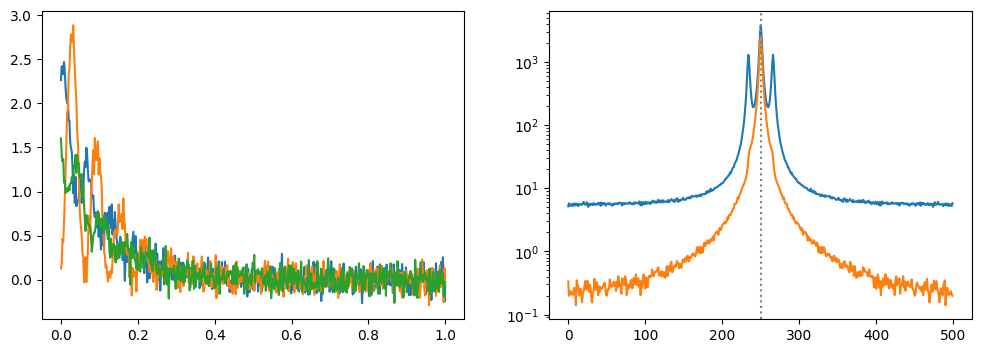

In [150]:
N = 500
N_ens = 1000

tau = 0.1
t = np.linspace(0,1,N)
size = (N,N_ens)

A_n = 0.1
I = np.outer(np.exp(-t/tau), np.ones(N_ens))
I += np.random.normal(size=size)*A_n
Q = np.zeros(size)
Q += np.random.normal(size=size)*A_n
Z = I + 1j*Q

w = 100
A = 1
for i in range(N_ens):
    Z[:,i] += A * np.exp(-t/tau) * np.exp(1j*w*t) * np.exp(1j*np.random.random()*2*np.pi)
    Z[:,i] += A * np.exp(-t/tau) * np.exp(-1j*w*t) * np.exp(1j*np.random.random()*2*np.pi)
    Z[:,i] += A * np.exp(-t/tau) * np.exp(-1j*0*t) * np.exp(1j*np.random.random()*2*np.pi)

Z = np.real(Z)
Z_f = np.fft.fft(Z, axis=0)

PSD1 = s(np.average(np.abs(Z_f)**2, axis=1))
PSD2 = s(np.abs(np.average(Z_f, axis=1))**2)

plt.subplots(figsize=(12,4))
plt.subplot(121)
plt.plot(t,np.real(Z)[:,0:3])
plt.subplot(122)
plt.plot(PSD1)
plt.plot(PSD2)
plt.yscale('log')
plt.axvline(N//2,ls=":", c="grey")

FFT hack of only the imaginary part will give only the incoherent part (probably what Chalmers is doing):

/tmp/ipykernel_61/1211528602.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


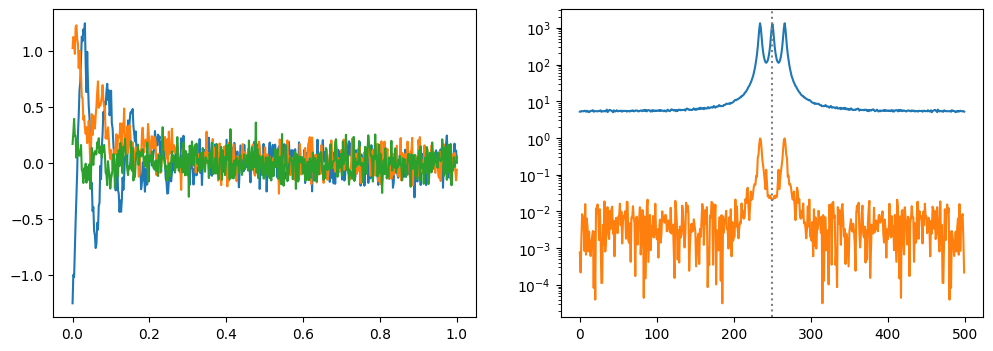

In [151]:
N = 500
N_ens = 1000

tau = 0.1
t = np.linspace(0,1,N)
size = (N,N_ens)

A_n = 0.1
I = np.outer(np.exp(-t/tau), np.ones(N_ens))
I += np.random.normal(size=size)*A_n
Q = np.zeros(size)
Q += np.random.normal(size=size)*A_n
Z = I + 1j*Q

w = 100
A = 1
for i in range(N_ens):
    Z[:,i] += A * np.exp(-t/tau) * np.exp(1j*w*t) * np.exp(1j*np.random.random()*2*np.pi)
    Z[:,i] += A * np.exp(-t/tau) * np.exp(-1j*w*t) * np.exp(1j*np.random.random()*2*np.pi)
    Z[:,i] += A * np.exp(-t/tau) * np.exp(-1j*0*t) * np.exp(1j*np.random.random()*2*np.pi)

Z = np.imag(Z)
Z_f = np.fft.fft(Z, axis=0)

PSD1 = s(np.average(np.abs(Z_f)**2, axis=1))
PSD2 = s(np.abs(np.average(Z_f, axis=1))**2)

plt.subplots(figsize=(12,4))
plt.subplot(121)
plt.plot(t,np.real(Z)[:,0:3])
plt.subplot(122)
plt.plot(PSD1)
plt.plot(PSD2)
plt.yscale('log')
plt.axvline(N//2,ls=":", c="grey")

Pick a finite-frequency IF:

/tmp/ipykernel_61/2914627471.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


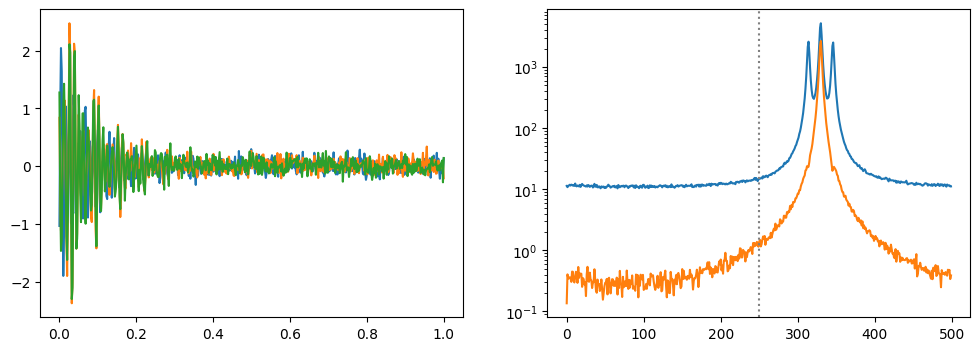

In [158]:
N = 500
N_ens = 1000

tau = 0.1
t = np.linspace(0,1,N)
size = (N,N_ens)

A_n = 0.1
w0 = 500
I = np.outer(np.exp(-t/tau)*np.cos(w0*t), np.ones(N_ens))
I += np.random.normal(size=size)*A_n
Q = np.outer(np.exp(-t/tau)*np.sin(w0*t), np.ones(N_ens))
Q += np.random.normal(size=size)*A_n
Z = I + 1j*Q

w = 100
A = 1
for i in range(N_ens):
    Z[:,i] += A * np.exp(-t/tau) * np.exp(1j*(w0+w)*t) * np.exp(1j*np.random.random()*2*np.pi)
    Z[:,i] += A * np.exp(-t/tau) * np.exp(1j*(w0-w)*t) * np.exp(1j*np.random.random()*2*np.pi)
    Z[:,i] += A * np.exp(-t/tau) * np.exp(1j*w0*t) * np.exp(1j*np.random.random()*2*np.pi)

Z_f = np.fft.fft(Z, axis=0)

PSD1 = s(np.average(np.abs(Z_f)**2, axis=1))
PSD2 = s(np.abs(np.average(Z_f, axis=1))**2)

plt.subplots(figsize=(12,4))
plt.subplot(121)
plt.plot(t,np.real(Z)[:,0:3])
plt.subplot(122)
plt.plot(PSD1)
plt.plot(PSD2)
plt.yscale('log')
plt.axvline(N//2,ls=":", c="grey")

Now, it should not matter if I do an "FFT" hack, I just lose a factor of two:

/tmp/ipykernel_61/85062246.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


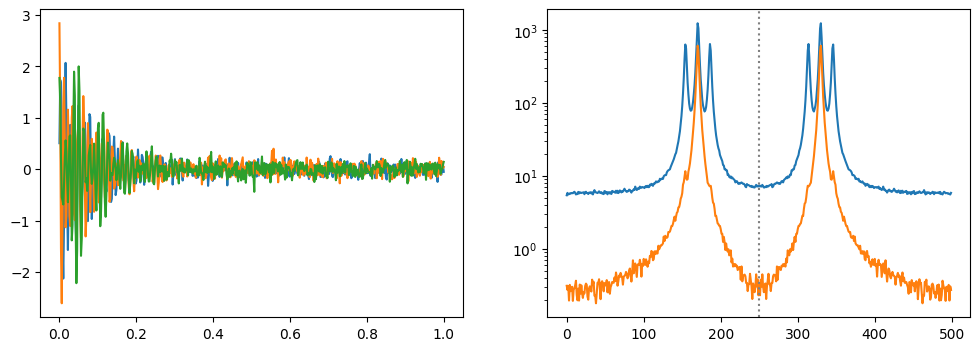

In [159]:
N = 500
N_ens = 1000

tau = 0.1
t = np.linspace(0,1,N)
size = (N,N_ens)

A_n = 0.1
w0 = 500
I = np.outer(np.exp(-t/tau)*np.cos(w0*t), np.ones(N_ens))
I += np.random.normal(size=size)*A_n
Q = np.outer(np.exp(-t/tau)*np.sin(w0*t), np.ones(N_ens))
Q += np.random.normal(size=size)*A_n
Z = I + 1j*Q

w = 100
A = 1
for i in range(N_ens):
    Z[:,i] += A * np.exp(-t/tau) * np.exp(1j*(w0+w)*t) * np.exp(1j*np.random.random()*2*np.pi)
    Z[:,i] += A * np.exp(-t/tau) * np.exp(1j*(w0-w)*t) * np.exp(1j*np.random.random()*2*np.pi)
    Z[:,i] += A * np.exp(-t/tau) * np.exp(1j*w0*t) * np.exp(1j*np.random.random()*2*np.pi)

Z = np.real(Z)
Z_f = np.fft.fft(Z, axis=0)

PSD1 = s(np.average(np.abs(Z_f)**2, axis=1))
PSD2 = s(np.abs(np.average(Z_f, axis=1))**2)

plt.subplots(figsize=(12,4))
plt.subplot(121)
plt.plot(t,np.real(Z)[:,0:3])
plt.subplot(122)
plt.plot(PSD1)
plt.plot(PSD2)
plt.yscale('log')
plt.axvline(N//2,ls=":", c="grey")

And, it does not matter if I take real or imaginary:

/tmp/ipykernel_61/2236009547.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


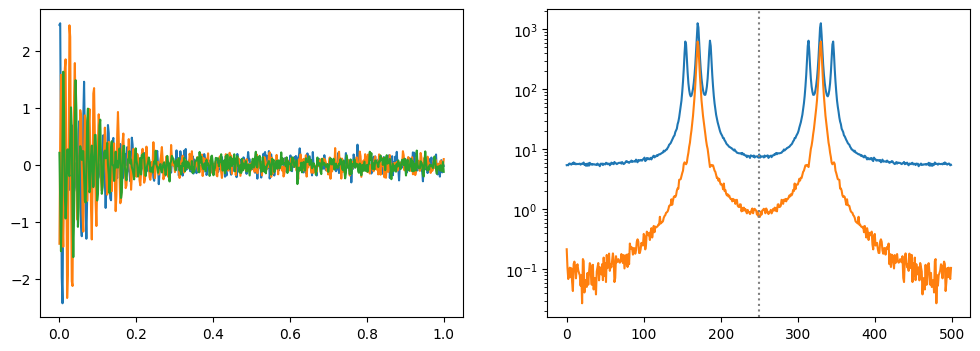

In [160]:
N = 500
N_ens = 1000

tau = 0.1
t = np.linspace(0,1,N)
size = (N,N_ens)

A_n = 0.1
w0 = 500
I = np.outer(np.exp(-t/tau)*np.cos(w0*t), np.ones(N_ens))
I += np.random.normal(size=size)*A_n
Q = np.outer(np.exp(-t/tau)*np.sin(w0*t), np.ones(N_ens))
Q += np.random.normal(size=size)*A_n
Z = I + 1j*Q

w = 100
A = 1
for i in range(N_ens):
    Z[:,i] += A * np.exp(-t/tau) * np.exp(1j*(w0+w)*t) * np.exp(1j*np.random.random()*2*np.pi)
    Z[:,i] += A * np.exp(-t/tau) * np.exp(1j*(w0-w)*t) * np.exp(1j*np.random.random()*2*np.pi)
    Z[:,i] += A * np.exp(-t/tau) * np.exp(1j*w0*t) * np.exp(1j*np.random.random()*2*np.pi)

Z = np.imag(Z)
Z_f = np.fft.fft(Z, axis=0)

PSD1 = s(np.average(np.abs(Z_f)**2, axis=1))
PSD2 = s(np.abs(np.average(Z_f, axis=1))**2)

plt.subplots(figsize=(12,4))
plt.subplot(121)
plt.plot(t,np.real(Z)[:,0:3])
plt.subplot(122)
plt.plot(PSD1)
plt.plot(PSD2)
plt.yscale('log')
plt.axvline(N//2,ls=":", c="grey")